In [1]:
import numpy as np
import pandas as pd

# Task 0
Read the dataset from csv file & perform data cleaning - remove all rows, which contains `?` in some columns.
Also check for data correctness (salary & salary $K).

In [22]:
df = pd.read_csv("../data/adult.csv")
df.replace("?", np.nan, inplace=True)
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)
print(df.head())

   Unnamed: 0  age         workclass  education      marital-status  \
0           0   39         State-gov  Bachelors       Never-married   
1           1   50  Self-emp-not-inc  Bachelors  Married-civ-spouse   
2           2   38           Private    HS-grad            Divorced   
3           3   53           Private       11th  Married-civ-spouse   
4           4   28           Private  Bachelors  Married-civ-spouse   

          occupation   relationship   race     sex  hours-per-week  \
0       Adm-clerical  Not-in-family  White    Male              40   
1    Exec-managerial        Husband  White    Male              13   
2  Handlers-cleaners  Not-in-family  White    Male              40   
3  Handlers-cleaners        Husband  Black    Male              40   
4     Prof-specialty           Wife  Black  Female              40   

  native-country salary  salary K$  
0  United-States  <=50K         39  
1  United-States  <=50K         35  
2  United-States  <=50K         27  
3  U

# Task 1
Print the count of men and women in the dataset.

In [24]:
gender_counts = df["sex"].value_counts()

print(gender_counts)

sex
Male      20380
Female     9782
Name: count, dtype: int64


# Task 2
Find the average age of men in dataset

In [26]:
average_age_men = df[df["sex"] == "Male"]["age"].mean()
print(average_age_men)

39.18400392541707


# Task 3
Get the percentage of people from Poland (native-country)

In [30]:
poland_count = df[df["native-country"] == "Poland"].shape[0]

total_count = df.shape[0]

poland_percentage = (poland_count / total_count) * 100
print(poland_percentage)

0.18566408063125786


# Task 4
Get the mean and standard deviation of the age for people who earn > 50K per year. After this, get it for those who earn <= 50K.

In [31]:
high_earners = df[df["salary"] == ">50K"]
mean_age_high_earners = high_earners["age"].mean()
std_age_high_earners = high_earners["age"].std()

low_earners = df[df["salary"] == "<=50K"]
mean_age_low_earners = low_earners["age"].mean()
std_age_low_earners = low_earners["age"].std()

print(mean_age_high_earners)
print(mean_age_low_earners)
print(std_age_high_earners)
print(std_age_low_earners)

43.95911028236548
36.60806038668668
10.269632835673852
13.464631257161633


# Task 5
Check, if there are some people without higher education (education: Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters, Doctorate), but with > 50K salary

In [32]:
higher_education = ["Bachelors", "Prof-school", "Assoc-acdm", "Assoc-voc", "Masters", "Doctorate"]

non_higher_education_high_salary = df[(~df["education"].isin(higher_education)) & (df["salary"] == ">50K")]

print(non_higher_education_high_salary)

       Unnamed: 0  age         workclass     education      marital-status  \
7               7   52  Self-emp-not-inc       HS-grad  Married-civ-spouse   
10             10   37           Private  Some-college  Married-civ-spouse   
51             55   43           Private  Some-college  Married-civ-spouse   
62             67   53           Private       HS-grad  Married-civ-spouse   
63             68   49      Self-emp-inc  Some-college  Married-civ-spouse   
...           ...  ...               ...           ...                 ...   
30075       32462   48      Self-emp-inc       HS-grad  Married-civ-spouse   
30125       32518   57         Local-gov       HS-grad  Married-civ-spouse   
30126       32519   46           Private  Some-college  Married-civ-spouse   
30158       32557   40           Private       HS-grad  Married-civ-spouse   
30161       32560   52      Self-emp-inc       HS-grad  Married-civ-spouse   

              occupation relationship   race     sex  hours-per

# Task 6
Get the statistics of age for each type of education. Use `groupby` and `describe` for this.

In [33]:
age_statistics_by_education = df.groupby("education")["age"].describe()

print(age_statistics_by_education)

               count       mean        std   min   25%   50%   75%   max
education                                                               
10th           820.0  37.897561  16.225795  17.0  23.0  36.0  52.0  90.0
11th          1048.0  32.363550  15.089307  17.0  18.0  28.5  43.0  90.0
12th           377.0  32.013263  14.373710  17.0  19.0  28.0  41.0  79.0
1st-4th        151.0  44.622517  14.929051  19.0  33.0  44.0  56.0  81.0
5th-6th        288.0  41.649306  14.754622  17.0  28.0  41.0  53.0  82.0
7th-8th        557.0  47.631957  15.737479  17.0  34.0  49.0  60.0  90.0
9th            455.0  40.303297  15.335754  17.0  28.0  38.0  53.0  90.0
Assoc-acdm    1008.0  37.286706  10.509755  19.0  29.0  36.0  44.0  90.0
Assoc-voc     1307.0  38.246366  11.181253  19.0  30.0  37.0  45.0  84.0
Bachelors     5044.0  38.641554  11.577566  19.0  29.0  37.0  46.0  90.0
Doctorate      375.0  47.130667  11.471727  24.0  39.0  47.0  54.0  80.0
HS-grad       9840.0  38.640955  13.067730  17.0  2

# Task 7
Compare the married and non-married men salaries. Who earns more? (>50K or <=50K)
Married men are those, whom `marital-status` starts with "Married". Others are not.

In [37]:
married_men = df[(df["sex"] == "Male") & (df["marital-status"].str.startswith("Married"))]
non_married_men = df[(df["sex"] == "Male") & (~df["marital-status"].str.startswith("Married"))]

married_high_salary_count = married_men[married_men["salary"] == ">50K"].shape[0]
married_low_salary_count = married_men[married_men["salary"] == "<=50K"].shape[0]

non_married_high_salary_count = non_married_men[non_married_men["salary"] == ">50K"].shape[0]
non_married_low_salary_count = non_married_men[non_married_men["salary"] == "<=50K"].shape[0]

print(married_high_salary_count)
print(non_married_high_salary_count)
print(married_low_salary_count)
print(non_married_low_salary_count)

5723
673
7052
6932


# Task 8
Get the max hours per week some person works. How many people works the same amount of hours per week?

In [40]:
max_hours_per_week = df["hours-per-week"].max()

num_people_max_hours = df[df["hours-per-week"] == max_hours_per_week].shape[0]

# Output the results
print("Maximum hours per week", max_hours_per_week)
print("Number of people who work:", num_people_max_hours)

Maximum hours per week 99
Number of people who work: 78


# Task 9
Analyze the correlation between data in dataset. Understand connected fields in it and print highlight thier connection.

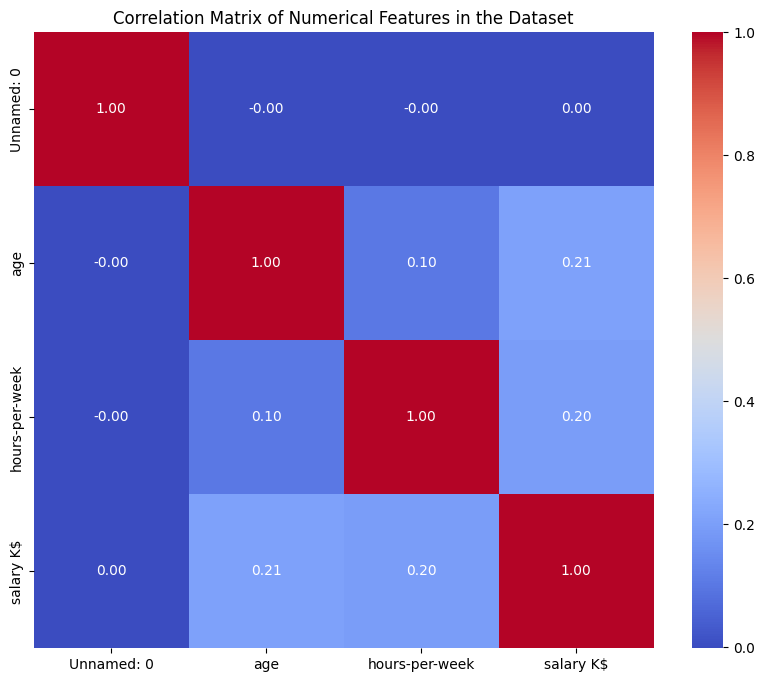

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_df = df.select_dtypes(include=["float64", "int64"])

correlation_matrix = numeric_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)
plt.title("Correlation Matrix of Numerical Features in the Dataset")
plt.show()
